In [300]:
from numpy import genfromtxt
import numpy as np
from numpy import linalg as LA
import sys
sys.path.insert(1, 'D:/data/ee559hw1/python3/')
import plotDecBoundaries

In [301]:
# !pip install scipy
from plotDecBoundaries import plotDecBoundaries
synthetic1_train = genfromtxt('D:\data\ee559hw1\python3\synthetic1_train.csv', delimiter=',')
synthetic1_test = genfromtxt('D:\data\ee559hw1\python3\synthetic1_test.csv', delimiter=',')
synthetic2_train = genfromtxt('D:\data\ee559hw1\python3\synthetic2_train.csv', delimiter=',')
synthetic2_test = genfromtxt('D:\data\ee559hw1\python3\synthetic2_test.csv', delimiter=',')

In [303]:
# index = np.where(synthetic1_train[:,2]==1)
# label_list = set(synthetic1_train[:,2])
# mean_list = {}
# # a = np.mean(synthetic1_train[:,:2][index],axis=0)
# for label in label_list:
#     index = np.where(synthetic1_train[:,2]==label)
#     mean_list[label] = np.mean(synthetic1_train[:,:2][index],axis=0)

# mean_list


In [304]:
# predicted = []
# for i in range(len(synthetic1_test)):
#     distant = {}
#     for label in label_list:
#         distant[label] = LA.norm(synthetic1_test[i,:2]-mean_list[label])
#     predicted.append(min(distant, key=distant.get))
# predicted = np.array(predicted)
# predicted


# Part (a)-(b)

In [307]:
# define a classifier
class nearest_mean_classifier():
    def __init__(self) -> None:
        self.label_list = None
        self.mean_list = None
    def fit(self, synthetic1_train, labels):
        label_list = set(labels)
        self.label_list = label_list
        mean_list = {}
        for label in label_list:
            index = np.where(labels==label)
            mean_list[label] = np.mean(synthetic1_train[:][index],axis=0)
        self.mean_list = mean_list
        return mean_list
    def  predict(self, data):
        predicted = []
        for i in range(len(data)):
            distant = {}
            for label in self.label_list:
                distant[label] = LA.norm(data[i]-self.mean_list[label])
            predicted.append(min(distant, key=distant.get))
        predicted = np.array(predicted)
        return predicted
    def print_all(self):
        print('label list \n',self.label_list)
        print('mean_list \n',self.mean_list)


**Train the classifier (i.e., calculate the class means) of synthesis dataset 1**

In [310]:
model1 = nearest_mean_classifier()
mean_list1 = model1.fit(synthetic1_train[:,:2], synthetic1_train[:,2])
predicted1 = model1.predict(synthetic1_test[:,:2])

In [311]:
# Calculate the error rate for test set
true_label1 = synthetic1_test[:,2]
error_rate1 = np.mean( true_label1 != predicted1 )
error_rate1

0.24

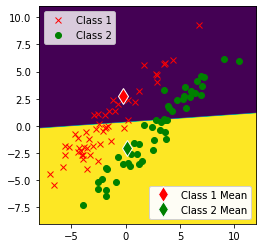

In [312]:
# plot the (training-set) data points, the resulting class means, decision boundaries, and decision regions
plotDecBoundaries(synthetic1_test[:,:2], synthetic1_test[:,2],np.array(list(mean_list.values())))

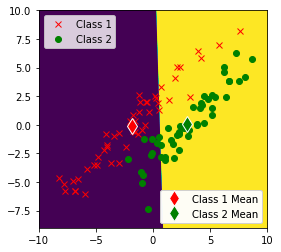

In [159]:
# plot the (testing-set) data points, the resulting class means, decision boundaries, and decision regions
plotDecBoundaries(synthetic1_train[:,:2], synthetic1_train[:,2],np.array(list(mean_list.values())))

**Train the classifier (i.e., calculate the class means) of synthesis dataset 2**

In [314]:
model2 = nearest_mean_classifier()
mean_list2 = model2.fit(synthetic2_train[:,:2], synthetic2_train[:,2])
predicted2 = model2.predict(synthetic2_test[:,:2])

In [317]:
true_label2 = synthetic2_test[:,2]
error_rate2 = np.mean( true_label2 != predicted2 )
error_rate2

0.04

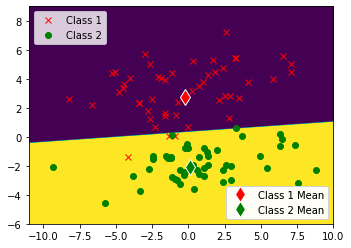

In [318]:
# plot the (testing-set) data points, the resulting class means, decision boundaries, and decision regions
plotDecBoundaries(synthetic2_test[:,:2], synthetic2_test[:,2],np.array(list(mean_list.values())))

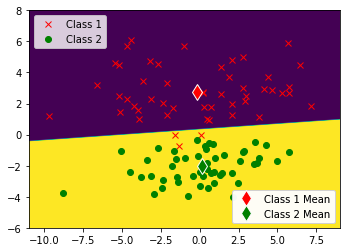

In [319]:
# plot the (Training-set) data points, the resulting class means, decision boundaries, and decision regions
plotDecBoundaries(synthetic2_train[:,:2], synthetic2_train[:,2],np.array(list(mean_list.values())))

In [320]:
wine_train = genfromtxt('D:\data\ee559hw1\python3\wine_train.csv', delimiter=',')
wine_test = genfromtxt('D:\data\ee559hw1\python3\wine_test.csv', delimiter=',')

# Part (c)-(e)

**part (c) Pick the first two features ( alcohol content, and malic acid content), and repeat the procedure of part (a) for this dataset**

In [324]:
model_wine = nearest_mean_classifier()
mean_list_wine = model_wine.fit(wine_train[:,[0,1]], wine_train[:,13])
predicted_wine = model_wine.predict(wine_test[:,[0,1]])

In [325]:
true_label2 = wine_test[:,13]
error_rate_wine = np.mean( true_label2 != predicted_wine )
error_rate_wine

0.2247191011235955

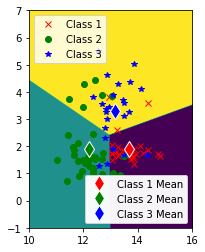

In [273]:
# plot the (Training-set) data points, the resulting class means, decision boundaries, and decision regions
plotDecBoundaries(wine_train[:,:2], wine_train[:,13],np.array(list(mean_list_wine.values())))

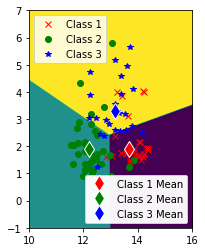

In [274]:
# plot the (testing-set) data points, the resulting class means, decision boundaries, and decision regions
plotDecBoundaries(wine_test[:,:2], wine_test[:,13],np.array(list(mean_list_wine.values())))

**part (d) Again for the “wine” dataset, find the 2 features among the 13 that achieve the minimum classification error on the training set using correlatino**

In [211]:
import pandas as pd
corr = pd.DataFrame(wine_train).corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.081282,0.227261,-0.322322,0.302949,0.205232,0.228328,-0.058095,0.122970,0.535460,-0.083714,0.018960,0.647778,-0.287929
1,0.081282,1.000000,0.168640,0.358857,0.018902,-0.381966,-0.470399,0.318034,-0.221250,0.249594,-0.495943,-0.398978,-0.213359,0.463356
2,0.227261,0.168640,1.000000,0.459380,0.417053,0.069353,0.056139,0.259357,0.018367,0.234011,-0.049759,-0.028017,0.144085,-0.040427
3,-0.322322,0.358857,0.459380,1.000000,-0.008080,-0.395829,-0.444965,0.455229,-0.170598,0.062488,-0.329861,-0.334254,-0.557175,0.539424
4,0.302949,0.018902,0.417053,-0.008080,1.000000,0.131899,0.127395,-0.179587,-0.011867,0.266028,-0.057883,-0.104678,0.346570,-0.117170
5,0.205232,-0.381966,0.069353,-0.395829,0.131899,1.000000,0.830401,-0.336899,0.605816,-0.070768,0.405830,0.689123,0.508965,-0.682450
6,0.228328,-0.470399,0.056139,-0.444965,0.127395,0.830401,1.000000,-0.479943,0.638742,-0.184561,0.533927,0.764652,0.573312,-0.855840
7,-0.058095,0.318034,0.259357,0.455229,-0.179587,-0.336899,-0.479943,1.000000,-0.194454,0.084259,-0.106624,-0.365665,-0.316338,0.373779
8,0.122970,-0.221250,0.018367,-0.170598,-0.011867,0.605816,0.638742,-0.194454,1.000000,0.049843,0.226056,0.490546,0.319334,-0.474718
9,0.535460,0.249594,0.234011,0.062488,0.266028,-0.070768,-0.184561,0.084259,0.049843,1.000000,-0.516732,-0.441858,0.250833,0.314391


**Looking at the final row of the matrix, we can see that the feature 6 and 11 have largest correlation score, so I pick that 2 feature to train**

In [326]:
model_wine = nearest_mean_classifier()
mean_list_wine = model_wine.fit(wine_train[:,[6,11]], wine_train[:,13])
predicted_wine = model_wine.predict(wine_test[:,[6,11]])
predicted_wine

array([1., 2., 2., 3., 2., 3., 2., 1., 2., 1., 1., 3., 2., 3., 1., 1., 3.,
       3., 1., 1., 3., 2., 2., 3., 2., 3., 3., 1., 3., 1., 2., 1., 1., 2.,
       3., 2., 1., 1., 3., 1., 3., 1., 2., 1., 1., 1., 3., 1., 2., 2., 1.,
       2., 2., 3., 1., 3., 3., 3., 2., 1., 3., 3., 2., 1., 1., 1., 1., 2.,
       1., 3., 1., 2., 1., 3., 1., 3., 1., 1., 1., 1., 1., 1., 3., 2., 2.,
       3., 2., 3., 3.])

In [327]:
#Error rate on test set
true_label2 = wine_test[:,13]
error_rate_wine = np.mean( true_label2 != predicted_wine )
error_rate_wine

0.1797752808988764

In [ ]:
#Error rate on test set
predicted_wine = model_wine.predict(wine_train[:,[6,11]])
error_rate_wine = np.mean( wine_train[:,13] != predicted_wine )
error_rate_wine

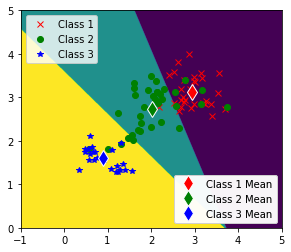

In [287]:
plotDecBoundaries(wine_train[:,[6,11]], wine_train[:,13],np.array(list(mean_list_wine.values())))

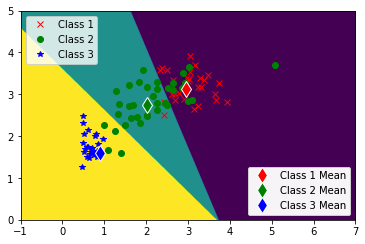

In [286]:
plotDecBoundaries(wine_test[:,[6,11]], wine_test[:,13],np.array(list(mean_list_wine.values())))